In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np

# Download DIV2K dataset (or use another source)
dataset_url = "http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url, extract=True)

# Function to load images
def load_images(data_dir, target_size=(128, 128)):
  images = []
  for file_name in os.listdir(data_dir):
    if file_name.endswith(".png") or file_name.endswith(".jpg"):
      img_path = os.path.join(data_dir, file_name)
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, target_size)
      images.append(img / 255.0) # Normalize
  # The return statement was inside the loop, causing it to exit prematurely
  # after processing only the first image. Moving it outside the loop ensures
  # all images are processed and returned.
  return np.array(images)

# Load data
data_dir = "/content/drive/MyDrive/ExtractedData/DIV2K_train_HR"
images = load_images(data_dir)

#Generate Low-Quality Versions

def add_noise(images):
  noise = np.random.normal(0, 0.1, images.shape)
  noisy_images = np.clip(images + noise, 0, 1)
  return noisy_images

low_quality_images = add_noise(images)

In [ ]:
from tensorflow.keras import layers, models

def build_unet(input_shape=(128, 128, 3)):
  inputs = layers.Input(input_shape) # Define inputs here

# Down-sampling
  conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
  conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
  pool1 = layers.MaxPooling2D((2, 2))(conv1)

  # The variable conv2 was being used before it was defined
  # It should be initialized with the output of pool1
  conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
  conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
  pool2 = layers.MaxPooling2D((2, 2))(conv2)

# Bottleneck
  bottleneck = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
  bottleneck = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bottleneck)

# Up-sampling
  up2 = layers.UpSampling2D((2, 2))(bottleneck)
  conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
  conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

  up1 = layers.UpSampling2D((2, 2))(conv3)
  conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
  conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

  outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(conv4)

  model = models.Model(inputs, outputs)
  return model

model = build_unet()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 3)         │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,698,947 (6.48 MB)

 Trainable params: 1,698,947 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Split dataset
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(low_quality_images, images, test_size=0.2)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 91s 15s/step - loss: 0.0809 - mae: 0.2457 - val_loss: 0.0635 - val_mae: 0.2114
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 136s 13s/step - loss: 0.0654 - mae: 0.2123 - val_loss: 0.0559 - val_mae: 0.1999
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 80s 13s/step - loss: 0.0556 - mae: 0.1930 - val_loss: 0.0464 - val_mae: 0.1775
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 14s/step - loss: 0.0466 - mae: 0.1736 - val_loss: 0.0433 - val_mae: 0.1734
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 147s 15s/step - loss: 0.0434 - mae: 0.1709 - val_loss: 0.0357 - val_mae: 0.1467
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 139s 14s/step - loss: 0.0339 - mae: 0.1455 - val_loss: 0.0328 - val_mae: 0.1357
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 136s 13s/step - loss: 0.0321 - mae: 0.1366 - val_loss: 0.0290 - val_mae: 0.1262
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 79s 13s/step - loss: 0.0291 - mae: 0.1303 - val_loss: 0.0298 - val_mae: 0.1259
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 14s/step - loss: 0.0299 - mae: 0.131

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(model, test_images, ground_truth):
  predictions = model.predict(test_images)

  # The for loop needs to be inside the function to access the function arguments
  for i in range(5):
    plt.figure(figsize=(15, 5))

    # Input image
    plt.subplot(1, 3, 1)
    plt.title("Low Quality")
    plt.imshow(test_images[i]) # Access the 'test_images' argument

    # Ground truth
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(ground_truth[i])

    # Predicted image
    plt.subplot(1, 3, 3)
    plt.title("Enhanced")
    plt.imshow(predictions[i])

    plt.show()

visualize_results(model, x_val[:5], y_val[:5])

Output hidden; open in https://colab.research.google.com to view.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


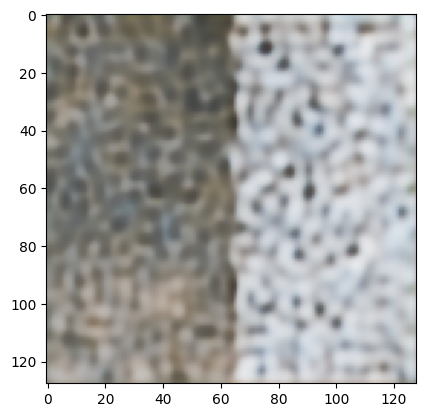

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError  # Import the MSE loss function

# Load the model
# Use 'mse' (string) instead of MeanSquaredError (class)
model = load_model("image_enhancement_model.h5", custom_objects={'mse': MeanSquaredError})

# Example inference
test_image = low_quality_images[0:1]
enhanced_image = model.predict(test_image)
plt.imshow(enhanced_image[0])

In [2]:
# Import libraries
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
#Import the loss function
from tensorflow.keras.losses import mse # Add this line to import the 'mse' function


# Load your trained model
model = load_model('/content/drive/MyDrive/image_enhancement_model.h5', custom_objects={'mse': mse})  # Replace with your model's filename and add the custom object

# Define image preprocessing and enhancement function
def enhance_image(input_image):
    """
    Enhance image color and contrast using the pre-trained model.
    Args:
        input_image (PIL.Image.Image): Input image uploaded by the user.
    Returns:
        PIL.Image.Image: Enhanced output image.
    """
    # Convert PIL image to numpy array
    input_image = np.array(input_image)

    # Normalize image to [0, 1] and resize to model's input size
    input_image_resized = cv2.resize(input_image, (128, 128)) / 255.0

    # Add batch dimension for model prediction
    input_image_batch = np.expand_dims(input_image_resized, axis=0)

    # Predict enhanced image
    enhanced_image = model.predict(input_image_batch)[0]

    # Rescale output to [0, 255] and convert to uint8
    enhanced_image = (enhanced_image * 255).astype('uint8')

    # Convert back to PIL image
    return Image.fromarray(enhanced_image)

# Create Gradio interface
interface = gr.Interface(
    fn=enhance_image,                  # Function to process the image
    inputs=gr.Image(type="pil"),       # Input as a PIL image
    outputs=gr.Image(type="pil"),      # Output as a PIL image
    title="AI Image Color & Contrast Enhancement",  # Application title
    description="Upload an image to enhance its color and contrast using AI.",  # App description
)

# Launch the application
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ff26d3ef837a5d2789.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
